In [1]:
import numpy as np
import pandas as pd
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
sf_permits = pd.read_csv("Building_Permits.csv")
sf_permits.sample(5)

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
94925,201508103829,8,otc alterations permit,08/10/2015,4259,032,2109,NaN,24th,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Potrero Hill,94107.0,"(37.753108094075905, -122.4007498595746)",1391501358521
152576,201703211990,8,otc alterations permit,03/21/2017,0309,011,172,NaN,Geary,St,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94108.0,"(37.7877774294891, -122.40635209361436)",1456884350878
9053,M383927,8,otc alterations permit,04/08/2013,6155,006,876,NaN,Girard,St,...,NaN,NaN,NaN,NaN,NaN,9.0,Portola,94134.0,"(37.7216847559312, -122.40256482865333)",1301079197052
21150,201308093955,8,otc alterations permit,08/09/2013,0510,015A,2272,NaN,Greenwich,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,2.0,Marina,94123.0,"(37.799059567778315, -122.43708902148089)",131372772458
179925,201708255892,8,otc alterations permit,08/25/2017,6023,028,305,NaN,Moscow,St,...,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.722537838771125, -122.42631803137046)",1476098194473


In [3]:
sf_permits.shape

(198900, 43)

### See how many missing data points we have

In [4]:
total_missing_count = sf_permits.isnull().sum()
total_missing_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [5]:
total_cells = np.product(sf_permits.shape)
total_cells

8552700

In [6]:
total_missing = total_missing_count.sum()
total_missing

2245941

In [7]:
total_missing/total_cells*100

26.26002315058403

### Figure out why the data is missing

In [8]:
sf_permits['Street Suffix'].unique()

array(['St', 'Av', 'Tr', 'Ct', 'Bl', 'Wy', 'Dr', nan, 'Rd', 'Cr', 'Pl',
       'Ln', 'Hy', 'Pk', 'Al', 'Pz', 'Wk', 'Rw', 'So', 'Sw', 'No', 'Hl'],
      dtype=object)

In [9]:
sf_permits.drop("Street Number Suffix",axis=1)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,0.0,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,NaN,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,0.0,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,NaN,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,St,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,St,NaN,...,5.0,wood frame (5),5.0,wood frame (5),NaN,NaN,NaN,NaN,NaN,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,St,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,St,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489608233656


In [10]:
col_to_drop = ["Street Number Suffix",'Unit','Unit Suffix',"Completed Date",'Structural Notification','Voluntary Soft-Story Retrofit','Fire Only Permit','TIDF Compliance','Site Permit']
data = sf_permits.drop(col_to_drop,axis = 1)

In [11]:
data.shape

(198900, 34)

In [12]:
data.isnull().sum()

Permit Number                                 0
Permit Type                                   0
Permit Type Definition                        0
Permit Creation Date                          0
Block                                         0
Lot                                           0
Street Number                                 0
Street Name                                   0
Street Suffix                              2768
Description                                 290
Current Status                                0
Current Status Date                           0
Filed Date                                    0
Issued Date                               14940
First Construction Document Date          14946
Number of Existing Stories                42784
Number of Proposed Stories                42868
Permit Expiration Date                    51880
Estimated Cost                            38066
Revised Cost                               6066
Existing Use                            

In [13]:
data.Zipcode.unique()

array([94102., 94109., 94107., 94122., 94124., 94117., 94114., 94131.,
       94115., 94108., 94104., 94123., 94110., 94133., 94121., 94105.,
       94103., 94118., 94132., 94112., 94134., 94116., 94127., 94158.,
       94130., 94111.,    nan, 94129.])

In [14]:
data1 = data.dropna(axis=0)

In [15]:
data1.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,St,evac maps,...,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
24,201708084249,8,otc alterations permit,08/08/2017,0542,039,1,Charlton,Ct,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.79739093461306, -122.43127133823367)",1473796372030
25,201708165014,8,otc alterations permit,08/16/2017,1824,006,1435,29th,Av,re-roofing,...,0.0,5.0,wood frame (5),5.0,wood frame (5),4.0,Sunset/Parkside,94122.0,"(37.76052279949518, -122.4879889739165)",1474841115935


In [17]:
data1.isnull().sum()

Permit Number                             0
Permit Type                               0
Permit Type Definition                    0
Permit Creation Date                      0
Block                                     0
Lot                                       0
Street Number                             0
Street Name                               0
Street Suffix                             0
Description                               0
Current Status                            0
Current Status Date                       0
Filed Date                                0
Issued Date                               0
First Construction Document Date          0
Number of Existing Stories                0
Number of Proposed Stories                0
Permit Expiration Date                    0
Estimated Cost                            0
Revised Cost                              0
Existing Use                              0
Existing Units                            0
Proposed Use                    

### Imputation (Filling in missing values with mean)

In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data = my_imputer.fit_transform(data)

### scaling

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats 
from mlxtend.preprocessing import minmax_scaling

In [23]:
ks = pd.read_csv("kickstarter.csv")
ks.sample(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
193340,1983862392,Reps4Vets Clothing Company,Apparel,Fashion,USD,2017-10-30,25000.0,2017-09-30 22:35:17,93.00,failed,6,US,53.00,93.00,25000.00
209793,2069242772,THE RACKET BOYS: A feature film...,Narrative Film,Film & Video,USD,2011-01-01,2000.0,2010-11-24 11:17:57,5000.01,successful,63,US,5000.01,5000.01,2000.00
257379,378753985,"Electronic Painting , retrolight diffuser ,aud...",Technology,Technology,CAD,2017-04-10,20000.0,2017-02-09 00:13:11,100.00,failed,1,CA,0.00,75.56,15111.45


Text(0.5, 1.0, 'Scaled data')

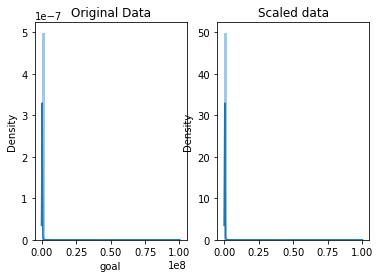

In [24]:
goal = ks.goal
scaled_data = minmax_scaling(goal, columns = [0])
fig, ax=plt.subplots(1,2)
sns.distplot(goal,ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("Scaled data")

### Normalization

Text(0.5, 1.0, 'Normalized data')

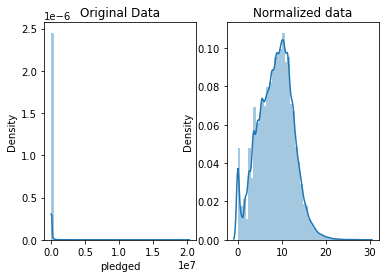

In [25]:
index = ks.pledged>0
pledges = ks.pledged.loc[index]
normalized_pledges = stats.boxcox(pledges)[0]
fig, ax=plt.subplots(1,2)
sns.distplot(pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

### Convert our date columns to datetime

In [26]:
import datetime

In [71]:
earthquake = pd.read_csv("earthquake_database.csv")
earthquake.sample(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
7230,10/19/1984,17:45:03,1.437,125.713,Earthquake,75.7,2.3,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,1.1,USP00028AC,US,US,HRV,Reviewed
255,09/12/1965,22:02:35,-6.416,70.726,Earthquake,25.0,NaN,NaN,6.3,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM853797,ISCGEM,ISCGEM,ISCGEM,Automatic
7205,09/28/1984,03:03:47,-21.510,-177.796,Earthquake,363.9,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,1.0,USP00027RX,US,US,HRV,Reviewed


In [50]:
earthquake.shape

(23412, 21)

In [33]:
earthquake.Date.dtype

dtype('O')

In [74]:
earthquake["Date_parsed"] = pd.to_datetime(earthquake['Date'],infer_datetime_format=True)
earthquake["Date_parsed"].sample(3)

3524     1975-07-08 00:00:00
1851     1971-02-12 00:00:00
18017    2006-08-30 00:00:00
Name: Date_parsed, dtype: object

In [75]:
earthquake["Date"] = pd.to_datetime(earthquake['Date'],format = "%m/%d/%Y",errors = 'coerce')
earthquake["Date"].sample(3)

18224   2007-01-20
5847    1981-04-05
1248    1969-05-15
Name: Date, dtype: datetime64[ns]

In [81]:
index= earthquake[earthquake["Date"].isna()].index
index

Int64Index([3378, 7512, 20650], dtype='int64')

In [87]:
E = earthquake.drop(index,axis = 0)
E.shape

(23409, 22)

In [88]:
E.Date.isna().sum()

0

In [90]:
day = E.Date.dt.day
day.unique()

array([ 2,  4,  5,  8,  9, 10, 12, 15, 16, 17, 24, 29,  1,  6,  7, 18, 21,
       23, 25, 26, 27,  3, 13, 14, 19, 22, 28, 30, 31, 11, 20],
      dtype=int64)

<AxesSubplot:xlabel='Date'>

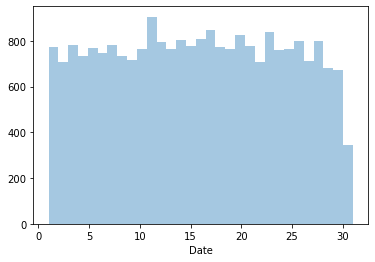

In [94]:
sns.distplot(day,kde=False, bins=31)

### Encoding

In [96]:
import chardet

In [109]:
before = "$नमस्ते#"
after = before.encode("utf-8", errors = "replace")
print(after.decode("utf-8"))

$नमस्ते#


In [118]:
df = pd.read_csv("PoliceKillingsUS.csv",encoding ='Windows-1252')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [119]:
with open("PoliceKillingsUS.csv",'rb') as f:
    result = chardet.detect(f.read(1000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [121]:
df.to_csv("PoliceKillingsUS-utf8.csv")

In [127]:
df1 = pd.read_csv("PoliceKillingsUS-utf8.csv")
df1.head()

,Unnamed: 0,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### Text pre-processing

In [129]:
with open("PakistanSuicideAttacks.csv",'rb') as f:
    result = chardet.detect(f.read(1000000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [141]:
suicide_attacks = pd.read_csv("PakistanSuicideAttacks.csv")
suicide_attacks.sample(3)

,S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,...,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
12,13,Friday-October 1-2004,17 SHa`baan 1425 A.H,Working Day,NaN,1:27 PM/1:25 PM,Sialkot,32.4972,74.5361,Punjab,...,shiite,25.0,31.0,50.0,75,1.0,NaN,Allama Iqbal Memorial DHQ Hospital-Sardar Begu...,27.51,81.518
118,119,Saturday-September 20-2008,20 RamaDHaan 1429 A.H,Working Day,NaN,NaN,North waziristan,32.9746,70.1456,KPK,...,None,7.0,17.0,5.0,20,1.0,NaN,1.CMH Bannu hospital,22.06,71.708
143,144,Tuesday-December 9-2008,11 Thw al-Hijjah 1429 A.H,Working Day,NaN,NaN,Buner,34.3943,72.6151,KPK,...,None,NaN,1.0,NaN,4,1.0,NaN,NaN,14.39,57.902


In [142]:
suicide_attacks.Province.unique()

array(['Capital', 'Sindh', 'Baluchistan', 'Punjab', 'FATA', 'KPK', 'AJK',
       'Fata', 'Balochistan'], dtype=object)

In [144]:
suicide_attacks['Province'] = suicide_attacks['Province'].str.lower()
suicide_attacks['Province'] = suicide_attacks['Province'].str.strip()

In [149]:
cities = suicide_attacks.Province.unique()
cities

array(['capital', 'sindh', 'baluchistan', 'punjab', 'fata', 'kpk', 'ajk',
       'balochistan'], dtype=object)

### Use fuzzy matching to correct inconsistent data entry

In [150]:
import fuzzywuzzy
from fuzzywuzzy import process

In [153]:
fuzzywuzzy.process.extract("baluchistan", cities, limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

[('baluchistan', 100), ('balochistan', 91), ('capital', 44)]

In [154]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    strings = df[column].unique()
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=3, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match

In [160]:
replace_matches_in_column(suicide_attacks,'Province','baluchistan')

In [161]:
suicide_attacks.Province.unique()

array(['capital', 'sindh', 'baluchistan', 'punjab', 'fata', 'kpk', 'ajk'],
      dtype=object)